In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  
df = pd.read_csv('ATP W1.csv', index_col = False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Columns: 379 entries, Qkey to Final weight
dtypes: float64(6), int64(1), object(372)
memory usage: 9.6+ MB


<ipython-input-1-b359e7816fc9>:6: DtypeWarning: Columns (65,339,348,349,350) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ATP W1.csv', index_col = False)


In [ ]:
df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
party = df.iloc[:,[-7]]

news_trust = []
news_distrust = []
news_total = []
#fill in missing responses and count selected responses
for person in range(3308):
    news_sources = 0
    for i in range(67,103):
        if df.iloc[person,[i]][-1] == "Selected":
            news_sources += 1
        else:
            df.iloc[person,[i]][-1] = "Not Selected"
            
    trusted = 0
    for i in range(103,139):
        if df.iloc[person,[i]][-1] == "Selected":
            trusted += 1
        else:
            df.iloc[person,[i]][-1] = "Not Selected"
    distrusted = 0
    for i in range(139,175):
        if df.iloc[person,[i]][-1] == "Selected":
            distrusted += 1
        else:
            df.iloc[person,[i]][-1] = "Not Selected"
    #find a proportion of trust and distrust and append as another feature
    proportion_trusted = trusted/news_sources if news_sources != 0 else 0
    proportion_distrusted = distrusted/news_sources if news_sources != 0 else 0
    news_trust.append(proportion_trusted)
    news_distrust.append(proportion_distrusted)
    news_total.append(news_sources)



In [ ]:
data = pd.DataFrame({'Total Sources': news_total, 'Proportion Trust': news_trust, 'Proportion Distrust': news_distrust})


from sklearn.preprocessing import OneHotEncoder #Here, identify features with hot encoding
import numpy as np
newDf = pd.read_csv('ATP W1.csv', index_col = False)
test = newDf.iloc[:,103:175] #trust, distrust sections
enc = OneHotEncoder(handle_unknown='ignore').fit(test)
print(enc.categories_)
colLab = np.concatenate(enc.categories_, axis=0)
#print(colLab)

ViableSources = ["ABC News", "CBS News", "NBC News", "NPR", 
                 "Rush Limbaugh Show (radio)", "Sean Hannity Show (radio)", 
                 "Washington Post", "New York Times", "Drudge Report", 
                 "Google News", "Huffington Post", "Breitbart", 
                 "The Blaze", "Daily Kos", "ThinkProgress.org", 
                 "The Guardian", "BBC", "The New Yorker", "Fox News Cable Channel",
                 "MSNBC", "CNN", "PBS", "Colbert Report", "Daily Show",
                 "Glenn Beck Program (Radio)", "Ed Schultz Show (radio)", 
                 "Wall Street Journal", "USA Today", "Slate", "Politico", 
                 "Mother Jones", "Yahoo News", "Bloomberg", "BuzzFeed",
                 "Al Jazeera America", "The Economist"]
for i in range(0,36):
    colLab[3*i] = "Not Trusted " + ViableSources[i]
    colLab[3*i+1] = "Trusted " + ViableSources[i]
    colLab[3*i+2] = "No Answer " + ViableSources[i]
  #Put all source options here

for i in range(0,36):
    colLab[4*i+108] = "Not Distrusted " + ViableSources[i]
    colLab[4*i+1+108] = "Refused Answer " + ViableSources[i]
    colLab[4*i+2+108] = "Distrusted " + ViableSources[i]
    colLab[4*i+3+108] = "No Answer " + ViableSources[i]
  #Put all source options here

dfHeard = pd.DataFrame(enc.transform(test).toarray(), columns = colLab)

newData = pd.concat([data,dfHeard], axis = 1)
#print(newData[1:3])
data = newData
data = data.values
print(newData.columns)


[array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=object), array(['Not selected', 'Selected', nan], dtype=

<ipython-input-45-028c189f6b7f>:6: DtypeWarning: Columns (65,339,348,349,350) have mixed types. Specify dtype option on import or set low_memory=False.
  newDf = pd.read_csv('ATP W1.csv', index_col = False)


In [ ]:
targetParty = newDf.iloc[:,376]
targetParty = targetParty.values
#encode targets with one hot encoder
targets = OneHotEncoder(categories=[['Consistent Cons', 'Lean Cons', 'Inconsistent', 'Lean Lib','Consistent Lib']], handle_unknown='ignore').fit(targetParty.reshape(-1,1))
print(targets.categories_)
y = targets.categories_

[array(['Consistent Cons', 'Lean Cons', 'Inconsistent', 'Lean Lib',
       'Consistent Lib'], dtype=object)]


#TRAINING

['Consistent Cons' 'Consistent Lib' 'Inconsistent' 'Lean Cons' 'Lean Lib']
                 precision    recall  f1-score   support

Consistent Cons       0.50      0.66      0.57        85
      Lean Cons       0.41      0.26      0.32       144
   Inconsistent       0.43      0.51      0.47       231
       Lean Lib       0.42      0.37      0.39       192
 Consistent Lib       0.64      0.64      0.64       175

       accuracy                           0.48       827
      macro avg       0.48      0.49      0.48       827
   weighted avg       0.47      0.48      0.47       827

[[ 56  12  16   1   0]
 [ 45  38  49   9   3]
 [ 12  35 118  51  15]
 [  0   6  69  71  46]
 [  0   2  24  37 112]]
[[-0.02881545 -0.34691626 -0.47346123 ... -0.23908571 -0.06363117
   0.12806523]
 [ 0.01039129  0.33185162 -0.32698156 ...  0.07077557 -0.28410633
   0.04456553]
 [ 0.01112925  0.46489461 -0.18325461 ...  0.03985505  0.26226158
  -0.10579731]
 [-0.00131787 -0.36679649  0.47032748 ...  0.07760

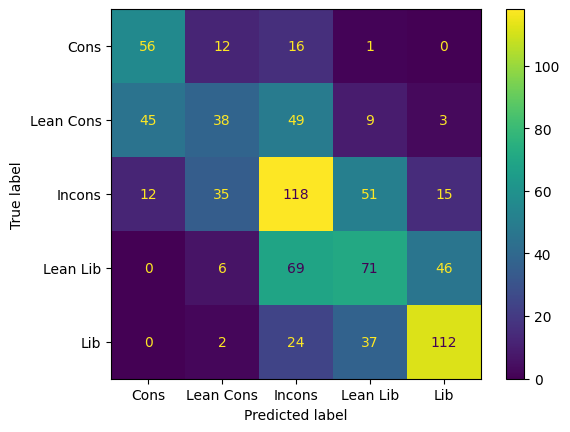

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
labels = ['Consistent Cons', 'Lean Cons', 'Inconsistent', 'Lean Lib','Consistent Lib']
shortlabels = ['Cons', 'Lean Cons', 'Incons', 'Lean Lib', 'Lib']
#{'Consistent Cons': .1, 'Lean Cons': .2, 'Inconsistent': .4, 'Lean Lib': .2,'Consistent Lib' : .1}

#split data
X_train, X_test, y_train, y_test = train_test_split(data, targetParty, test_size=0.25, random_state=42)
#logistic regression training
logModel = LogisticRegression(random_state=4, max_iter = 10000, class_weight='balanced').fit(X_train, y_train)
#classification report on predictions for test
cr = classification_report(y_test, logModel.predict(X_test), labels = labels, target_names = labels)
#confusion matrix for predicted classes
cm = confusion_matrix(y_test, logModel.predict(X_test), labels = labels)
print(logModel.classes_)
print(cr)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=shortlabels)
disp.plot()
probDf = pd.DataFrame(np.round(logModel.predict_proba(X_test)*100), columns = labels)
tempAxis = pd.DataFrame(probDf.iloc[:,1])
probDf.iloc[:,1] = probDf.iloc[:,3]
probDf.iloc[:,3] = probDf.iloc[:,4]
probDf.iloc[:,4] = tempAxis


Consistent Cons
Not Distrusted Fox News Cable Channel
Distrusted Mother Jones
Distrusted MSNBC
Refused Answer Rush Limbaugh Show (radio)
Trusted Rush Limbaugh Show (radio)


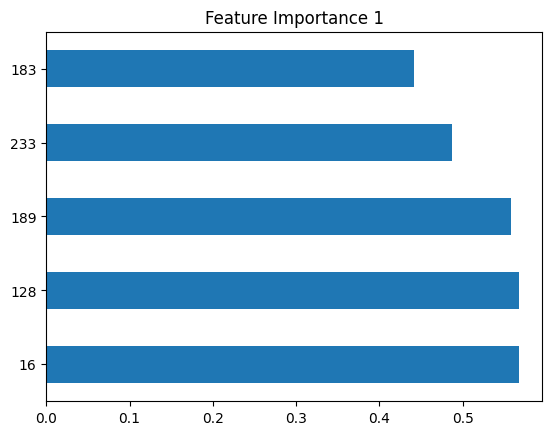

Consistent Lib
Not Distrusted ThinkProgress.org
Distrusted Rush Limbaugh Show (radio)
Refused Answer Ed Schultz Show (radio)
Trusted Ed Schultz Show (radio)
Distrusted Fox News Cable Channel


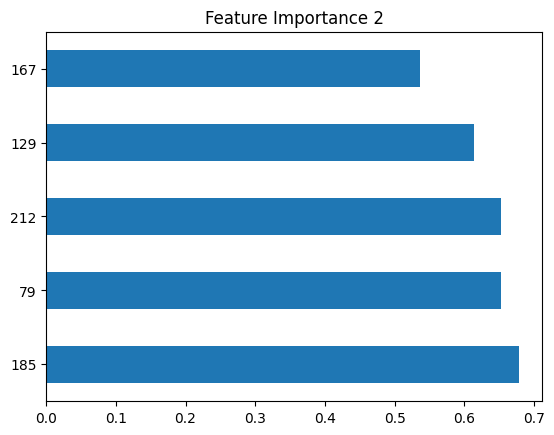

Inconsistent
Not Distrusted The New Yorker
Not Distrusted Breitbart
Not Distrusted ThinkProgress.org
Distrusted Google News
Proportion Trust


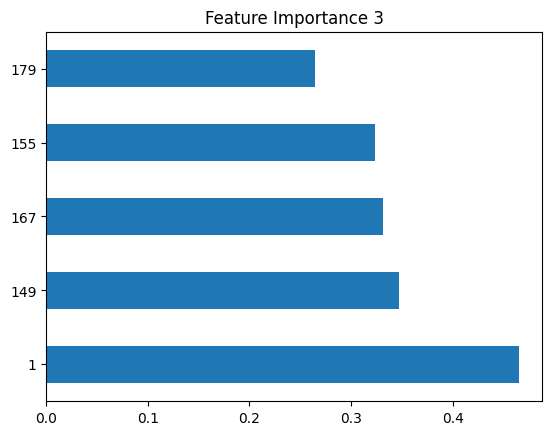

Lean Cons
Distrusted The Blaze
Distrusted Daily Kos
Distrusted Ed Schultz Show (radio)
Proportion Distrust
Distrusted ThinkProgress.org


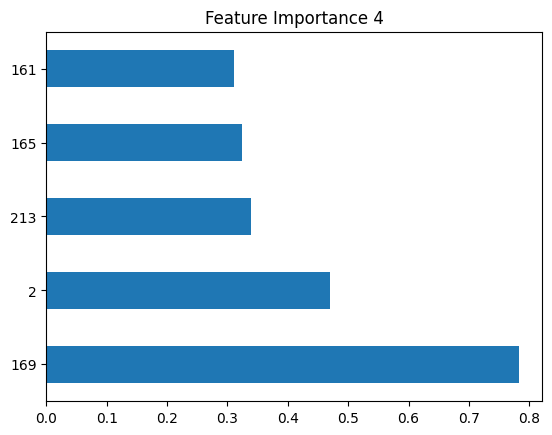

Lean Lib
Not Trusted Breitbart
Distrusted Fox News Cable Channel
Distrusted The Economist
Not Trusted Fox News Cable Channel
Proportion Distrust


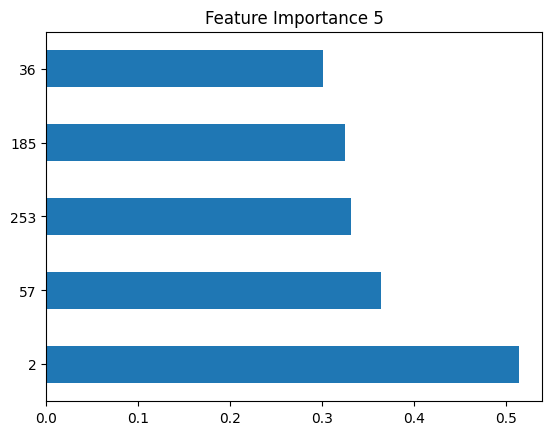

In [ ]:
import matplotlib.pyplot as plt
columnSources = newData.columns
#find the top weighted features for each class and display in order
for i in range(5):
  print(logModel.classes_[i])
  importance = logModel.coef_[i]
  feat_importances = pd.Series(importance)
  array = feat_importances.nlargest(5).index
  for j in range(5):
    print(columnSources[array[4-j]])
  feat_importances.nlargest(5).plot(kind='barh',title = 'Feature Importance ' + str(i+1))
  plt.show()